#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, KFold, RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
normal_data = pd.read_csv(os.getcwd() + '/Data/brain_tumour_normalized.csv')
normal_data.head()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,Image1,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0,0
1,Image2,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0,0
2,Image3,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0,1
3,Image4,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0,1
4,Image5,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0,0


In [3]:
X, Y = normal_data[normal_data.columns[1 : 14]], normal_data[normal_data.columns[-1]]
X.shape, Y.shape

((3762, 13), (3762,))

**Scoring Metrics**

* Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$
* Sensitivity/Recall/True Positive Rate: $\frac{TP}{TP + FN}$
* Precision: $\frac{TP}{TP + FP}$

#### Logistic Regression

Without repeated folds:

In [4]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [5]:
logisticRegr = LogisticRegression()  # create model

# scores = cross_val_score(logisticRegr, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(logisticRegr, X, Y, scoring = scoring, cv = cv)  # calc scores

In [6]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 97.76736836164571
Test std. dev. of accuracy: 0.00571257777793943
----------
Test sensitivity: 95.59511220121823
Test std. dev. of sensitivity: 0.009996565858764742
----------
Test precision: 99.3829416467252
Test std. dev. of precision: 0.0076385140281729665


With repeated folds:

In [7]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [8]:
logisticRegr = LogisticRegression()  # create model

# scores = cross_val_score(logisticRegr, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(logisticRegr, X, Y, scoring = scoring, cv = cvr)  # calc scores

In [9]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 97.76713320917281
Test std. dev. of accuracy: 0.006159991467893768
----------
Test sensitivity: 95.61377746947295
Test std. dev. of sensitivity: 0.011689808989269064
----------
Test precision: 99.38271338403048
Test std. dev. of precision: 0.00632075362030211


#### SVM - RBF Kernel

Without repeated folds:

In [10]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [11]:
svm_rbf = SVC(kernel = 'rbf', gamma = 'auto')  # create model

# scores = cross_val_score(svm_rbf, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(svm_rbf, X, Y, scoring = scoring, cv = cv)  # calc scores

In [12]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 97.36871437440037
Test std. dev. of accuracy: 0.006099179752415618
----------
Test sensitivity: 94.64201801930665
Test std. dev. of sensitivity: 0.01272535348350196
----------
Test precision: 99.4354283324675
Test std. dev. of precision: 0.006491511485627216


With repeated folds:

In [13]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [14]:
svm_rbf = SVC(kernel = 'rbf', gamma = 'auto')  # create model

# scores = cross_val_score(svm_rbf, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(svm_rbf, X, Y, scoring = scoring, cv = cvr)  # calc scores

In [15]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 97.32408243505087
Test std. dev. of accuracy: 0.006544625993357317
----------
Test sensitivity: 94.56174244043238
Test std. dev. of sensitivity: 0.013799421984076441
----------
Test precision: 99.43720253875018
Test std. dev. of precision: 0.006099486445891794


#### SVM - Sigmoid Kernel

Without repeated folds:

In [16]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [17]:
svm_sigmoid = SVC(kernel = 'sigmoid', gamma = 'auto')  # create model

# scores = cross_val_score(svm_sigmoid, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(svm_sigmoid, X, Y, scoring = scoring, cv = cv)  # calc scores

In [18]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 96.99658558609403
Test std. dev. of accuracy: 0.007416498502075566
----------
Test sensitivity: 93.75070295166508
Test std. dev. of sensitivity: 0.016050735602826164
----------
Test precision: 99.49275283470044
Test std. dev. of precision: 0.0061636257802505584


With repeated folds:

In [19]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [20]:
svm_sigmoid = SVC(kernel = 'sigmoid', gamma = 'auto')  # create model

# scores = cross_val_score(svm_sigmoid, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(svm_sigmoid, X, Y, scoring = scoring, cv = cvr)  # calc scores

In [21]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 97.00514513610624
Test std. dev. of accuracy: 0.007028382236675999
----------
Test sensitivity: 93.751563025565
Test std. dev. of sensitivity: 0.015142580003395382
----------
Test precision: 99.53572511185212
Test std. dev. of precision: 0.00537362255982363


#### SVM - Linear Kernel

Without repeated folds:

In [22]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [23]:
svm_linear = SVC(kernel = 'linear', gamma = 'auto')  # create model

# scores = cross_val_score(svm_linear, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(svm_linear, X, Y, scoring = scoring, cv = cv)  # calc scores

In [24]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 97.7940346520684
Test std. dev. of accuracy: 0.005691111741719891
----------
Test sensitivity: 95.70603237516706
Test std. dev. of sensitivity: 0.010492246102443046
----------
Test precision: 99.32438169962037
Test std. dev. of precision: 0.007362865695907951


With repeated folds:

In [25]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [26]:
svm_linear = SVC(kernel = 'linear', gamma = 'auto')  # create model

# scores = cross_val_score(svm_linear, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(svm_linear, X, Y, scoring = scoring, cv = cvr)  # calc scores

In [27]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 97.81152999604943
Test std. dev. of accuracy: 0.006384816120426538
----------
Test sensitivity: 95.74876215429734
Test std. dev. of sensitivity: 0.011872340315982584
----------
Test precision: 99.34301840500225
Test std. dev. of precision: 0.006501344114147272


Other classifiers to add: AdaBoostClassifier (priority), XGBoost (priority), GaussianProcessClassifier, MLPClassifier, RandomForestClassifier, 

#### Decision Tree

Finding optimal depth and tree:

In [35]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

scoring = ['accuracy', 'precision', 'recall']  # select metrics

# scores_list, scores_mean, scores_std = [], [], []

acc_mean, acc_std, prec_mean, prec_std, recall_mean, recall_std = [], [], [], [], [], []

depth_range = [i for i in range(1, 21)]  # depth of the trees

for depth in depth_range:
    dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)  # create model based on Gini impurity
    
#     scores = cross_val_score(dTree, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

#     scores_list.append(scores)
#     scores_mean.append(scores.mean())
#     scores_std.append(scores.std())
    
    scores = cross_validate(dTree, X, Y, scoring = scoring, cv = cv)  # calc scores
    
    acc_mean.append(scores['test_accuracy'].mean())
    acc_std.append(scores['test_accuracy'].std())
    recall_mean.append(scores['test_recall'].mean())
    recall_std.append(scores['test_recall'].std())

Plotting:

In [43]:
def dTreePlot(scores_mean, scores_std, metr):
#     scores_mean, scores_std = np.array(scores_mean), np.array(scores_std)

    plt.plot(depth_range, scores_mean, color = '#552583', label = '{} at depth'.format(metr))
    plt.fill_between(depth_range, scores_mean - 1.5 * scores_std, scores_mean + 1.5 * scores_std, color = '#1c39bb', alpha = 0.2)
    plt.xticks(depth_range)
    plt.grid()
    plt.legend()
    plt.title('10-fold Cross Validation DTree {} versus Depth'.format(metr))
    plt.xlabel('Depth')
    plt.ylabel(metr)
#     plt.savefig(os.getcwd() + '/Graphs/crossValid/dTree' + metr)
    plt.show()
    plt.close()

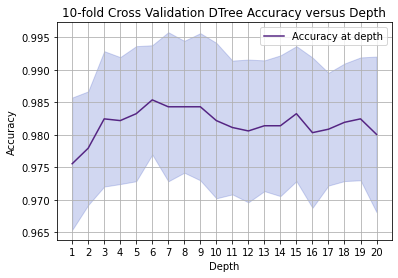

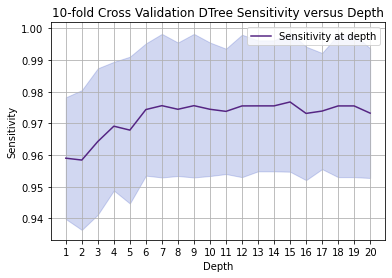

In [44]:
acc_mean, acc_std = np.array(acc_mean), np.array(acc_std)
recall_mean, recall_std = np.array(recall_mean), np.array(recall_std)

dTreePlot(acc_mean, acc_std, 'Accuracy')
dTreePlot(recall_mean, recall_std, 'Sensitivity')

In [46]:
max_idx = acc_mean.argmax()
print('Highest accuracy:', acc_mean[max_idx] * 100)
print('Corresponding accuracy std. dev.:', acc_std[max_idx])
print('Corresponding sensitivity:', recall_mean[max_idx] * 100)
print('Corresponding sensitivity std. dev.:', recall_std[max_idx] * 100)
print('Depth:', depth_range[max_idx])
print('-' * 10)
max_idx = recall_mean.argmax()
print('Highest sensitivity:', recall_mean[max_idx] * 100)
print('Corresponding sensitivity std. dev.:', recall_std[max_idx])
print('Corresponding accuracy:', acc_mean[max_idx] * 100)
print('Corresponding accuracy std. dev.:', acc_std[max_idx] * 100)
print('Depth:', depth_range[max_idx])

Highest accuracy: 98.5380805914555
Corresponding accuracy std. dev.: 0.005608397170564248
Corresponding sensitivity: 97.4400736823756
Corresponding sensitivity std. dev.: 1.392320673352791
Depth: 6
----------
Highest sensitivity: 97.6792426833093
Corresponding sensitivity std. dev.: 0.014682884865792147
Corresponding accuracy: 98.32573790845984
Corresponding accuracy std. dev.: 0.6926774312225153
Depth: 15


#### Naive Bayes

Without repeated folds:

In [28]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)  # create CV splits

In [29]:
naiveBayes = GaussianNB()  # create model

# scores = cross_val_score(naiveBayes, X, Y, scoring = 'accuracy', cv = cv)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(naiveBayes, X, Y, scoring = scoring, cv = cv)  # calc scores

In [30]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 96.67757774140753
Test std. dev. of accuracy: 0.0066257507165831675
----------
Test sensitivity: 93.88528735984488
Test std. dev. of sensitivity: 0.014013152227985791
----------
Test precision: 98.6343584918859
Test std. dev. of precision: 0.009549531109872238


With repeated folds:

In [31]:
cvr = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)  # creates CV splits for repeated KFold CV

In [32]:
naiveBayes = GaussianNB()  # create model

# scores = cross_val_score(naiveBayes, X, Y, scoring = 'accuracy', cv = cvr)  # calc accuracy

scoring = ['accuracy', 'precision', 'recall']  # select metrics
scores = cross_validate(naiveBayes, X, Y, scoring = scoring, cv = cvr)  # calc scores

In [33]:
print('Test accuracy:', scores['test_accuracy'].mean() * 100)
print('Test std. dev. of accuracy:', scores['test_accuracy'].std())
print('-' * 10)
print('Test sensitivity:', scores['test_recall'].mean() * 100)
print('Test std. dev. of sensitivity:', scores['test_recall'].std())
print('-' * 10)
print('Test precision:', scores['test_precision'].mean() * 100)
print('Test std. dev. of precision:', scores['test_precision'].std())

Test accuracy: 96.66847734070771
Test std. dev. of accuracy: 0.00839503195695032
----------
Test sensitivity: 93.89329614731722
Test std. dev. of sensitivity: 0.016835656746151402
----------
Test precision: 98.61071451510591
Test std. dev. of precision: 0.009095547654943258
